### 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
SGD

RMSprop

AdaGrad

Adam

In [1]:
import os
import tensorflow.keras
import itertools

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tensorflow.keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [tensorflow.keras.optimizers.SGD, tensorflow.keras.optimizers.RMSprop, tensorflow.keras.optimizers.Adagrad, tensorflow.keras.optimizers.Adam]

In [7]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train 

Epoch 48/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.7948 - accuracy: 0.7161 - val_loss: 1.7169 - val_accuracy: 0.4765
Epoch 49/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.7471 - accuracy: 0.7336 - val_loss: 1.7708 - val_accuracy: 0.4848
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.7552 - accuracy: 0.7315 - val_loss: 1.6257 - val_accuracy: 0.5060
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (Non

Epoch 45/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3081 - accuracy: 0.0990 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3080 - accuracy: 0.0991 - val_loss: 2.3180 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3080 - accuracy: 0.1002 - val_loss: 2.3179 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3081 - accuracy: 0.0992 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3075 - accuracy: 0.1012 - val_loss: 2.3092 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3083 - accuracy: 0.0968 - val_loss: 2.3138 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adag

Epoch 42/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.0079 - accuracy: 0.6389 - val_loss: 1.5950 - val_accuracy: 0.4751
Epoch 43/50
50000/50000 [==============================] - 1s 30us/sample - loss: 0.9931 - accuracy: 0.6432 - val_loss: 1.6752 - val_accuracy: 0.4665
Epoch 44/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9806 - accuracy: 0.6468 - val_loss: 1.5634 - val_accuracy: 0.4905
Epoch 45/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9567 - accuracy: 0.6577 - val_loss: 1.5561 - val_accuracy: 0.4900
Epoch 46/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9422 - accuracy: 0.6641 - val_loss: 1.9241 - val_accuracy: 0.4350
Epoch 47/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9204 - accuracy: 0.6700 - val_loss: 1.6588 - val_accuracy: 0.4857
Epoch 48/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9064 - accuracy:

Epoch 39/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3069 - accuracy: 0.0983 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3078 - accuracy: 0.1031 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3069 - accuracy: 0.0970 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3081 - accuracy: 0.0986 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3061 - accuracy: 0.0987 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3066 - accuracy: 0.1000 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3069 - accuracy:

Epoch 36/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3254 - accuracy: 0.5350 - val_loss: 1.4340 - val_accuracy: 0.4864
Epoch 37/50
50000/50000 [==============================] - 1s 28us/sample - loss: 1.3164 - accuracy: 0.5353 - val_loss: 1.4822 - val_accuracy: 0.4698
Epoch 38/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3098 - accuracy: 0.5397 - val_loss: 1.5203 - val_accuracy: 0.4739
Epoch 39/50
50000/50000 [==============================] - 1s 28us/sample - loss: 1.2994 - accuracy: 0.5430 - val_loss: 1.5473 - val_accuracy: 0.4634
Epoch 40/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.2899 - accuracy: 0.5462 - val_loss: 1.5294 - val_accuracy: 0.4614
Epoch 41/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.2880 - accuracy: 0.5473 - val_loss: 1.5864 - val_accuracy: 0.4423
Epoch 42/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.2836 - accuracy:

Epoch 33/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8343 - accuracy: 0.3172 - val_loss: 1.8783 - val_accuracy: 0.2998
Epoch 34/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8308 - accuracy: 0.3180 - val_loss: 1.8783 - val_accuracy: 0.2996
Epoch 35/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8295 - accuracy: 0.3211 - val_loss: 1.8387 - val_accuracy: 0.3219
Epoch 36/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8220 - accuracy: 0.3229 - val_loss: 1.9030 - val_accuracy: 0.3146
Epoch 37/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8265 - accuracy: 0.3231 - val_loss: 2.0004 - val_accuracy: 0.2667
Epoch 38/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8297 - accuracy: 0.3194 - val_loss: 1.8988 - val_accuracy: 0.2894
Epoch 39/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8234 - accuracy:

Epoch 30/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.2176 - accuracy: 0.5715 - val_loss: 1.3675 - val_accuracy: 0.5163
Epoch 31/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.2095 - accuracy: 0.5762 - val_loss: 1.5261 - val_accuracy: 0.4805
Epoch 32/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1970 - accuracy: 0.5798 - val_loss: 1.4704 - val_accuracy: 0.4913
Epoch 33/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1917 - accuracy: 0.5823 - val_loss: 1.4399 - val_accuracy: 0.4889
Epoch 34/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1748 - accuracy: 0.5876 - val_loss: 1.4528 - val_accuracy: 0.4898
Epoch 35/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1712 - accuracy: 0.5892 - val_loss: 1.3379 - val_accuracy: 0.5265
Epoch 36/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1587 - accuracy:

Epoch 27/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5057 - accuracy: 0.4574 - val_loss: 1.5625 - val_accuracy: 0.4421
Epoch 28/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5060 - accuracy: 0.4598 - val_loss: 1.5869 - val_accuracy: 0.4309
Epoch 29/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4981 - accuracy: 0.4617 - val_loss: 1.5551 - val_accuracy: 0.4464
Epoch 30/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4958 - accuracy: 0.4626 - val_loss: 1.6494 - val_accuracy: 0.4233
Epoch 31/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4878 - accuracy: 0.4676 - val_loss: 1.5868 - val_accuracy: 0.4369
Epoch 32/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5021 - accuracy: 0.4596 - val_loss: 1.5620 - val_accuracy: 0.4355
Epoch 33/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5011 - accuracy:

Epoch 24/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.8003 - accuracy: 0.3719 - val_loss: 1.7997 - val_accuracy: 0.3713
Epoch 25/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7942 - accuracy: 0.3740 - val_loss: 1.7938 - val_accuracy: 0.3764
Epoch 26/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7882 - accuracy: 0.3760 - val_loss: 1.7880 - val_accuracy: 0.3740
Epoch 27/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7824 - accuracy: 0.3782 - val_loss: 1.7827 - val_accuracy: 0.3787
Epoch 28/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7769 - accuracy: 0.3789 - val_loss: 1.7763 - val_accuracy: 0.3813
Epoch 29/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7715 - accuracy: 0.3822 - val_loss: 1.7708 - val_accuracy: 0.3836
Epoch 30/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7661 - accuracy:

Epoch 21/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.2129 - accuracy: 0.5689 - val_loss: 1.5742 - val_accuracy: 0.4576
Epoch 22/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.1946 - accuracy: 0.5731 - val_loss: 1.5094 - val_accuracy: 0.4880
Epoch 23/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.1753 - accuracy: 0.5830 - val_loss: 1.4733 - val_accuracy: 0.4939
Epoch 24/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.1570 - accuracy: 0.5850 - val_loss: 1.4948 - val_accuracy: 0.4835
Epoch 25/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.1321 - accuracy: 0.5955 - val_loss: 1.5315 - val_accuracy: 0.4760
Epoch 26/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.1176 - accuracy: 0.6002 - val_loss: 1.5541 - val_accuracy: 0.4697
Epoch 27/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.0998 - accuracy:

Epoch 18/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6769 - accuracy: 0.4167 - val_loss: 1.6843 - val_accuracy: 0.4089
Epoch 19/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6682 - accuracy: 0.4188 - val_loss: 1.6740 - val_accuracy: 0.4175
Epoch 20/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6602 - accuracy: 0.4229 - val_loss: 1.6779 - val_accuracy: 0.4128
Epoch 21/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6530 - accuracy: 0.4256 - val_loss: 1.6726 - val_accuracy: 0.4156
Epoch 22/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6460 - accuracy: 0.4271 - val_loss: 1.6558 - val_accuracy: 0.4249
Epoch 23/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6390 - accuracy: 0.4298 - val_loss: 1.6463 - val_accuracy: 0.4271
Epoch 24/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.6324 - accuracy:

Epoch 15/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.2299 - accuracy: 0.5617 - val_loss: 1.3960 - val_accuracy: 0.5139
Epoch 16/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.2048 - accuracy: 0.5705 - val_loss: 1.3535 - val_accuracy: 0.5197
Epoch 17/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.1921 - accuracy: 0.5765 - val_loss: 1.3761 - val_accuracy: 0.5179
Epoch 18/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.1670 - accuracy: 0.5814 - val_loss: 1.3618 - val_accuracy: 0.5235
Epoch 19/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.1591 - accuracy: 0.5856 - val_loss: 1.3668 - val_accuracy: 0.5187
Epoch 20/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.1241 - accuracy: 0.5978 - val_loss: 1.3771 - val_accuracy: 0.5198
Epoch 21/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.1075 - accuracy:

Epoch 12/50
50000/50000 [==============================] - 1s 28us/sample - loss: 2.2117 - accuracy: 0.1999 - val_loss: 2.2089 - val_accuracy: 0.2059
Epoch 13/50
50000/50000 [==============================] - 1s 28us/sample - loss: 2.2039 - accuracy: 0.2056 - val_loss: 2.2013 - val_accuracy: 0.2112
Epoch 14/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.1964 - accuracy: 0.2096 - val_loss: 2.1939 - val_accuracy: 0.2170
Epoch 15/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.1892 - accuracy: 0.2129 - val_loss: 2.1868 - val_accuracy: 0.2192
Epoch 16/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.1822 - accuracy: 0.2163 - val_loss: 2.1800 - val_accuracy: 0.2202
Epoch 17/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.1754 - accuracy: 0.2192 - val_loss: 2.1734 - val_accuracy: 0.2225
Epoch 18/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.1689 - accuracy:

Epoch 9/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.4802 - accuracy: 0.4785 - val_loss: 1.6743 - val_accuracy: 0.4102
Epoch 10/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.4575 - accuracy: 0.4857 - val_loss: 1.5179 - val_accuracy: 0.4594
Epoch 11/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.4334 - accuracy: 0.4934 - val_loss: 1.4864 - val_accuracy: 0.4727
Epoch 12/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.4124 - accuracy: 0.5024 - val_loss: 1.5438 - val_accuracy: 0.4488
Epoch 13/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.3925 - accuracy: 0.5101 - val_loss: 1.4327 - val_accuracy: 0.4849
Epoch 14/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.3724 - accuracy: 0.5173 - val_loss: 1.4804 - val_accuracy: 0.4666
Epoch 15/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.3549 - accuracy: 

Epoch 6/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1758 - accuracy: 0.2143 - val_loss: 2.1659 - val_accuracy: 0.2205
Epoch 7/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1593 - accuracy: 0.2249 - val_loss: 2.1503 - val_accuracy: 0.2308
Epoch 8/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1441 - accuracy: 0.2325 - val_loss: 2.1358 - val_accuracy: 0.2383
Epoch 9/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1300 - accuracy: 0.2388 - val_loss: 2.1223 - val_accuracy: 0.2487
Epoch 10/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1167 - accuracy: 0.2475 - val_loss: 2.1093 - val_accuracy: 0.2509
Epoch 11/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.1040 - accuracy: 0.2521 - val_loss: 2.0967 - val_accuracy: 0.2569
Epoch 12/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.0916 - accuracy: 0.2

Epoch 3/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6267 - accuracy: 0.4290 - val_loss: 1.6036 - val_accuracy: 0.4288
Epoch 4/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5732 - accuracy: 0.4483 - val_loss: 1.5827 - val_accuracy: 0.4377
Epoch 5/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.5344 - accuracy: 0.4605 - val_loss: 1.5284 - val_accuracy: 0.4657
Epoch 6/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4983 - accuracy: 0.4740 - val_loss: 1.5167 - val_accuracy: 0.4569
Epoch 7/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4640 - accuracy: 0.4843 - val_loss: 1.4810 - val_accuracy: 0.4752
Epoch 8/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4338 - accuracy: 0.4961 - val_loss: 1.4787 - val_accuracy: 0.4647
Epoch 9/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4156 - accuracy: 0.5029

50000/50000 [==============================] - 2s 36us/sample - loss: 2.3919 - accuracy: 0.0886 - val_loss: 2.3852 - val_accuracy: 0.0914
Epoch 2/50
50000/50000 [==============================] - 1s 28us/sample - loss: 2.3854 - accuracy: 0.0892 - val_loss: 2.3790 - val_accuracy: 0.0910
Epoch 3/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3795 - accuracy: 0.0898 - val_loss: 2.3734 - val_accuracy: 0.0931
Epoch 4/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3741 - accuracy: 0.0903 - val_loss: 2.3682 - val_accuracy: 0.0948
Epoch 5/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3690 - accuracy: 0.0912 - val_loss: 2.3635 - val_accuracy: 0.0962
Epoch 6/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3643 - accuracy: 0.0923 - val_loss: 2.3590 - val_accuracy: 0.0980
Epoch 7/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3600 - accuracy: 0.0935 - val_loss

50000/50000 [==============================] - 2s 40us/sample - loss: 2.1156 - accuracy: 0.2453 - val_loss: 1.9988 - val_accuracy: 0.2978
Epoch 2/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9407 - accuracy: 0.3240 - val_loss: 1.9036 - val_accuracy: 0.3350
Epoch 3/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8671 - accuracy: 0.3513 - val_loss: 1.8462 - val_accuracy: 0.3525
Epoch 4/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8207 - accuracy: 0.3687 - val_loss: 1.8284 - val_accuracy: 0.3518
Epoch 5/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.7875 - accuracy: 0.3795 - val_loss: 1.7759 - val_accuracy: 0.3789
Epoch 6/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7602 - accuracy: 0.3905 - val_loss: 1.7564 - val_accuracy: 0.3939
Epoch 7/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.7369 - accuracy: 0.3977 - val_loss

50000/50000 [==============================] - 2s 35us/sample - loss: 2.3362 - accuracy: 0.0901 - val_loss: 2.3263 - val_accuracy: 0.0948
Epoch 2/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3237 - accuracy: 0.0961 - val_loss: 2.3158 - val_accuracy: 0.1028
Epoch 3/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3146 - accuracy: 0.1056 - val_loss: 2.3079 - val_accuracy: 0.1186
Epoch 4/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3075 - accuracy: 0.1191 - val_loss: 2.3015 - val_accuracy: 0.1314
Epoch 5/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3017 - accuracy: 0.1307 - val_loss: 2.2961 - val_accuracy: 0.1428
Epoch 6/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.2966 - accuracy: 0.1385 - val_loss: 2.2913 - val_accuracy: 0.1474
Epoch 7/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.2921 - accuracy: 0.1442 - val_loss

50000/50000 [==============================] - 2s 36us/sample - loss: 2.1438 - accuracy: 0.2267 - val_loss: 2.0177 - val_accuracy: 0.2906
Epoch 2/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.9557 - accuracy: 0.3184 - val_loss: 1.9072 - val_accuracy: 0.3355
Epoch 3/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.8719 - accuracy: 0.3487 - val_loss: 1.8447 - val_accuracy: 0.3589
Epoch 4/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.8201 - accuracy: 0.3654 - val_loss: 1.8021 - val_accuracy: 0.3696
Epoch 5/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.7833 - accuracy: 0.3808 - val_loss: 1.7722 - val_accuracy: 0.3838
Epoch 6/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.7541 - accuracy: 0.3912 - val_loss: 1.7456 - val_accuracy: 0.3904
Epoch 7/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.7278 - accuracy: 0.4010 - val_loss

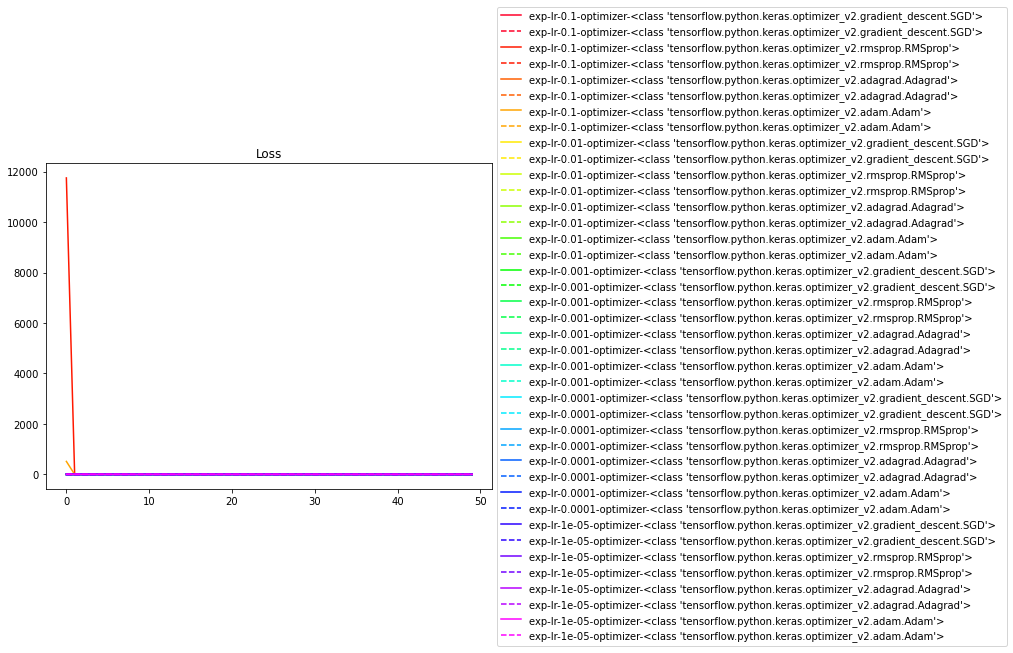

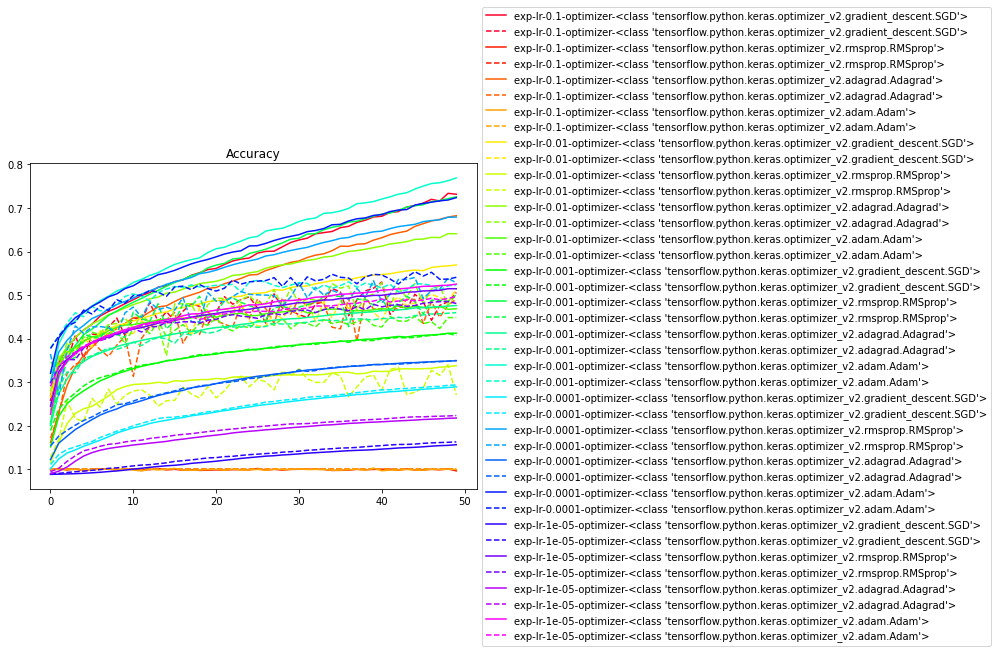

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()